## Exploratory Data Analysis
### Section 1: Understanding the input data

##### Load libraries

In [13]:
from utils import *
import pandas as pd
import matplotlib.pyplot as plt

##### Load data

In [8]:
data = load_dataset_from_source("./data")
links = data['links.csv']
ratings = data['ratings.csv']
movies = data['movies.csv']
tags = data['tags.csv']

##### EDA
##### 1. Ratings

In [30]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


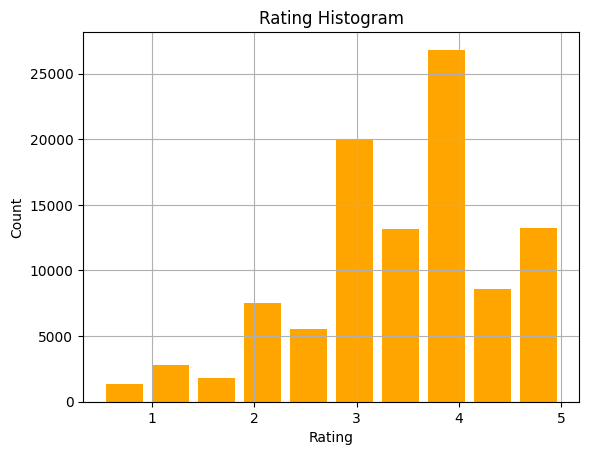

In [22]:
ratings['rating'].hist(bins=10, rwidth=0.8, color='orange')
plt.title('Rating Histogram')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [24]:
ratings["userId"].unique().size

610

##### 2. Movies

In [29]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


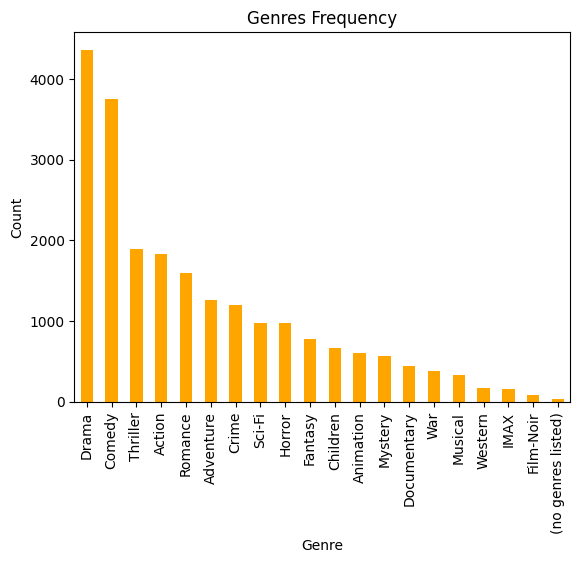

In [ ]:
genres = movies['genres'].str.split('|')
genres = genres.explode()
genres.value_counts().plot(kind='bar', color='orange')
plt.title('Genres Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

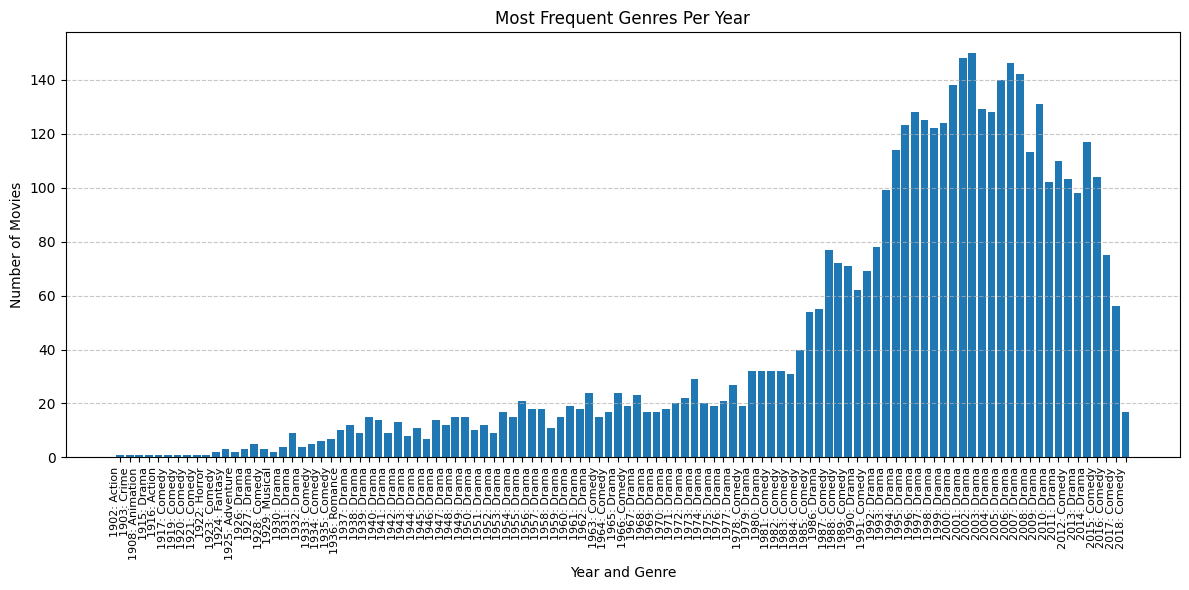

In [42]:
# Split the genres column into individual genres
movies = movies.assign(genres=movies["genres"].str.split("|")).explode("genres")

# Count the number of movies per genre per year
genre_counts = movies.groupby(["year", "genres"]).size().reset_index(name="count")

# Find the most frequent genres for each year
most_frequent_genres = genre_counts.loc[genre_counts.groupby("year")["count"].idxmax()]

# Combine year and genre for better x-axis labeling
most_frequent_genres["label"] = most_frequent_genres["year"].astype(str) + ": " + most_frequent_genres["genres"]

# Plot the most frequent genres per year
plt.figure(figsize=(12, 6))
plt.bar(
    most_frequent_genres["label"],
    most_frequent_genres["count"],
)

plt.title("Most Frequent Genres Per Year")
plt.xlabel("Year and Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90, ha="right", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

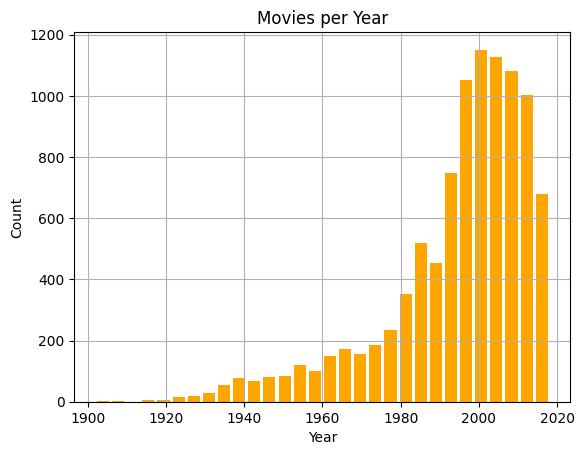

In [35]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'] = movies['year'].astype(float)
movies['year'].hist(bins=30, rwidth=0.8, color='orange')
plt.title('Movies per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

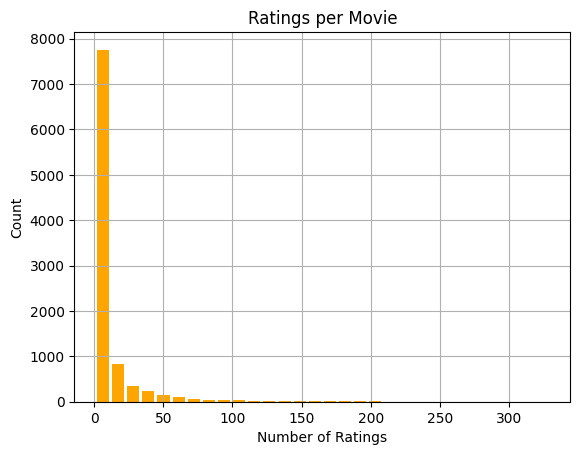

In [36]:
ratings['movieId'].value_counts().hist(bins=30, rwidth=0.8, color='orange')
plt.title('Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()